<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Word Embeddings</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2018/03/06/08/31/drone-3202860_1280.jpg" width="720"/></center>

<center><font size=5>Product Reviews Sentiment Analysis </center></font>

## Problem Statement

### Business Context

In the rapidly evolving landscape of e-commerce, customer reviews play a pivotal role in shaping the perception of products and influencing purchasing decisions. All businesses recognize the significance of understanding customer sentiment and extracting valuable insights from the vast pool of customer reviews to drive decisions. The inability to actively track customer feedback can result in significant challenges for businesses. Negative sentiments expressed by customers become crucial to track and resolve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and the potential loss of loyal customers. This may result in customers opting for alternative platforms for their future purchases, impacting long-term revenue and market share.

2. Reputation Damage: The persistence of negative sentiment, if not effectively managed, can tarnish the reputation of the business. Potential customers may be dissuaded from making purchases on the platform due to concerns raised in negative reviews, affecting brand loyalty and trust.

3. Financial Implications: Negative sentiment can lead to a decline in sales, impacting profitability. Discouraged by negative feedback, potential customers may choose competitors, resulting in direct financial repercussions for the company.

### Problem Definition

A rising e-commerce platform in the space of electronic gadgets captures customer feedback through different channels, such as product review forms, surveys, and more. In addition, they also capture customer feedback from social media platforms. After witnessing a 200% growth in their customer base in the last three years, they are now experiencing a substantial upswing in the number of customer feedbacks received, with a noteworthy increase of ~25% over the past six months.

As they were previously monitoring customer feedback manually, this surge in customer feedback presents a multifaceted challenge for the business as the volume of reviews has surpassed the manual capacity to track and analyze effectively. Recognizing the need for a proactive and scalable solution, the organization seeks to employ artificial intelligence (AI) to aid them. The primary objective is to develop an AI solution that can automatically assess and categorize customer sentiments as negative, positive, or neutral by parsing and analyzing product reviews. As a Data Scientist, you are provided with the reviews shared by customers regarding their experience with the product along with the manually labeled sentiments of the reviews and asked to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary

- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

## Importing the necessary libraries

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
reviews = pd.read_csv("/content/Product_Reviews.csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

### Checking the shape of the dataset

In [ ]:
data.shape

(1007, 3)

* The dataset has 1007 rows and 3 columns.

### Checking for Missing Values

In [ ]:
data.isnull().sum()

Product ID        0
Product Review    0
Sentiment         0
dtype: int64

* There are no missing values in the data

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

2

* There are 2 duplicate values in the dataset.
* We'll drop them.

In [ ]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of sentiments

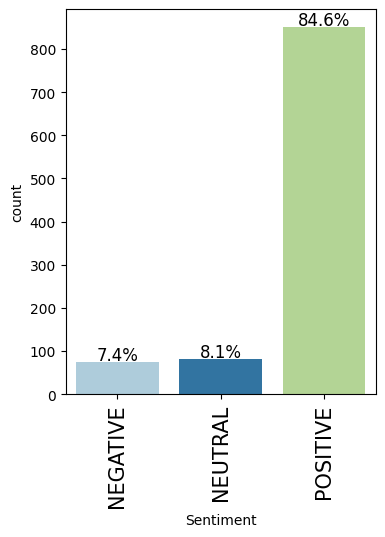

In [ ]:
labeled_barplot(data, "Sentiment", perc=True)

- Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

## Text Preprocessing

### Removing special characters from the text

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

- We can observe that all the text has now successfully been converted to lower case.

### Removing extra whitespace

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

* We observe that all the stopwords have been removed.

### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either chang light level certain time day everi read also glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow prefac littl histori casual reader own nook simpl touch 2011 read harri potter seri girl dragon tattoo seri 1984 brave new world key titl fair say nook get much use mani other may gotten fast forward today full week new kindl paperwhit admit love kindl read let relat review love read back kindl invest 139 00 experi receiv buy kindl simpli pay screen entir experi includ buy amazon read hunger game trilog shall move onto diverg seri soon thing nook hinder past 4 year never inspir pick get hand dive never feel oh man read thing awesom howev paperwhit feel desir back simpli ador kindl consid purchas one stop think simpli go full week 3 download book ton read still half batteri left well make happi inspir reader insid
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoy far great read origin fire sinc 2012 fire use make eye hurt read long experienc paperwhit yet


## Text Vectorization

### Count Vectorizer

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(1007, 1000)

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [ ]:
# Checking the words considered by BoW model
words

array(['000', '10', '100', '11', '139', '15', '16', '16gb', '17', '20',
       '2013', '2014', '2015', '2017', '212', '24', '2nd', '30', '300',
       '35', '36weight', '3rd', '40', '4gbpage', '50', '500', '60', '6x0',
       '70', '7x4', '80', '89', '90', '99', 'abil', 'abl', 'absolut',
       'access', 'account', 'accur', 'across', 'activ', 'actual', 'ad',
       'adapt', 'add', 'addit', 'address', 'adjust', 'advertis', 'afford',
       'age', 'ago', 'alarm', 'alexa', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'although', 'alway', 'amaz', 'amazon', 'amount',
       'android', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'anyway',
       'anywher', 'app', 'appear', 'appl', 'area', 'around', 'arriv',
       'ask', 'aspect', 'assist', 'assum', 'attach', 'attempt', 'attent',
       'attract', 'audio', 'automat', 'avail', 'averag', 'away', 'awesom',
       'back', 'background', 'bad', 'bag', 'balanc', 'band', 'base',
       'basi', 'basic', 'bass', 'batteri', 'beach', 

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,10,100,11,139,15,16,16gb,17,20,...,worth,would,write,wrong,xbox,ye,year,yet,youll,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- From the above dataframe, we can observe that the word *yet* is present only once in the third document, and the word *would* is presented twice in the fourth document.

### Word2Vec

In [ ]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in data['final_cleaned_text'].values]

In [ ]:
# Checking the words from the first five reviews
words_list[0:5]

[['initi',
  'troubl',
  'decid',
  'paperwhit',
  'voyag',
  'review',
  'less',
  'said',
  'thing',
  'paperwhit',
  'great',
  'spend',
  'money',
  'go',
  'voyag',
  'fortun',
  'friend',
  'own',
  'end',
  'buy',
  'paperwhit',
  'basi',
  'model',
  '300',
  'ppi',
  '80',
  'dollar',
  'jump',
  'turn',
  'pricey',
  'voyag',
  'page',
  'press',
  'alway',
  'sensit',
  'fine',
  'specif',
  'set',
  'need',
  'auto',
  'light',
  'adjust',
  'week',
  'love',
  'paperwhit',
  'regret',
  'touch',
  'screen',
  'recept',
  'easi',
  'use',
  'keep',
  'light',
  'specif',
  'set',
  'regardless',
  'time',
  'day',
  'case',
  'hard',
  'chang',
  'set',
  'either',
  'chang',
  'light',
  'level',
  'certain',
  'time',
  'day',
  'everi',
  'read',
  'also',
  'glad',
  'went',
  'intern',
  'ship',
  'option',
  'amazon',
  'extra',
  'expens',
  'deliveri',
  'time',
  'track',
  'didnt',
  'need',
  'worri',
  'custom',
  'may',
  'use',
  'third',
  'parti',
  'ship',


In [ ]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 3954


Let's check out a few word embeddings using the trained model.

In [ ]:
# Checking the word embedding of a random word
word = "review"
model_W2V.wv[word]

array([-0.4139086 ,  0.574371  ,  0.04366034, -0.02913691,  0.3139211 ,
       -0.8221761 ,  0.03769577,  1.267649  , -0.4665555 , -0.34082636,
       -0.46843404, -0.5357608 ,  0.14892381,  0.540041  ,  0.50801694,
       -0.39561465,  0.1907246 , -0.38802946, -0.13264117, -0.9506628 ,
        0.3296535 ,  0.05621688,  0.180567  , -0.61821586, -0.01334396,
        0.08626563, -0.21338329, -0.6248323 , -0.75239444,  0.17420074,
        0.5592746 ,  0.04257032,  0.2262617 , -0.32286537, -0.1857953 ,
        1.0297074 , -0.08236088, -0.5171413 , -0.20832072, -1.0553468 ,
        0.18890096, -0.3726612 ,  0.0706719 , -0.06603853,  0.5519392 ,
       -0.1659914 , -0.5304125 ,  0.1258887 ,  0.47946763, -0.04463182,
        0.25147113, -0.5916971 , -0.12256969, -0.16455159, -0.35686815,
        0.11230833,  0.31280687,  0.16752495, -0.36037537,  0.15501241,
        0.2921222 ,  0.04350196, -0.12045418,  0.19815108, -0.4354359 ,
        0.2739332 ,  0.39675108,  0.3130975 , -0.82747304,  0.60

In [ ]:
# Checking top 5 similar words to the word 'review'
similar = model_W2V.wv.similar_by_word('review', topn=5)
print(similar)

[('worth', 0.9996016621589661), ('time', 0.999564528465271), ('one', 0.9995487928390503), ('replac', 0.9995458722114563), ('purchas', 0.9995437860488892)]


**Note**: The similarity between words is computed using cosine similarity.

In [ ]:
# Checking top 5 similar words to the word 'book'
similar = model_W2V.wv.similar_by_word('book', topn=5)
print(similar)

[('read', 0.9996383786201477), ('see', 0.9995620846748352), ('get', 0.9995251297950745), ('want', 0.9995025396347046), ('time', 0.9994716644287109)]


In [ ]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,...,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140,403.559140
1,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,...,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846,661.153846
2,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,...,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222,270.222222
3,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,...,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065,702.258065
4,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,...,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552,487.896552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,...,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778,488.777778
1003,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,...,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164,400.590164
1004,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,...,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333,572.708333
1005,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,...,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333,470.708333


### GloVe

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model.index_to_key))

Length of the vocabulary is 8564


In [ ]:
# Checking the word embedding of a random word
word = "book"
model[word]

array([-1.9744e-01,  4.4831e-01,  1.3689e-01, -1.5595e-01,  9.3600e-01,
        7.2986e-01,  3.4099e-01, -3.3896e-01, -8.9569e-02, -4.7706e-01,
        3.5112e-01, -4.2198e-01, -1.2221e-01, -6.3375e-02, -4.5820e-01,
        7.8723e-01,  9.4045e-01,  8.1101e-02, -2.3224e-01,  4.0778e-01,
        3.3258e-01, -4.4458e-01, -4.7117e-01,  1.4852e-01,  9.6308e-01,
       -6.5267e-02, -5.3661e-02, -6.7474e-01, -4.2364e-01,  9.4392e-02,
       -3.8668e-01,  1.8237e-01, -1.2846e-01, -2.1952e-01, -5.8993e-01,
        7.3602e-01, -2.4009e-01,  3.2392e-01, -2.4663e-01, -4.0684e-01,
       -5.2468e-01,  4.6174e-01, -1.4936e-01, -1.1999e-01, -1.3990e-01,
       -4.4944e-01, -2.6565e-01, -7.0061e-01,  3.0188e-01, -1.1209e-01,
        6.6323e-01,  3.9698e-01,  6.9158e-01,  8.3442e-01, -5.2717e-01,
       -2.5314e+00,  1.3281e-01,  3.0253e-01,  1.1062e+00,  7.2221e-03,
        2.6031e-01,  1.1584e+00, -7.9330e-02, -7.6659e-01,  1.2623e+00,
       -6.2071e-01,  5.9821e-01,  7.3539e-01,  3.8573e-01, -4.02

In [ ]:
#Returning the top 5 similar words.
result = model.most_similar("book", topn=5)
print(result)

[('books', 0.847648561000824), ('novel', 0.8181166648864746), ('published', 0.8023924231529236), ('story', 0.7941390872001648), ('author', 0.7937875390052795)]


In [ ]:
#Returning the top 5 similar words.
result = model.most_similar("review", topn=5)
print(result)

[('reviewed', 0.7733739614486694), ('reviews', 0.7296553254127502), ('report', 0.7117360830307007), ('reviewing', 0.7047094702720642), ('recommendations', 0.6845268607139587)]


In [ ]:
#List of words in the vocabulary
words = model.index_to_key

In [ ]:
#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(model.index_to_key,list(model.vectors)))

In [ ]:
#Defining the dimension of the embedded vector.
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.084951,0.207658,0.232286,-0.094349,-0.045856,0.041737,-0.103758,0.209399,-0.111843,-0.041754,...,-0.062681,0.020708,0.027296,-0.113980,-0.440573,-0.004020,-0.086978,-0.264891,0.476578,0.068214
1,-0.051071,0.268699,0.340737,-0.282067,-0.022394,0.247727,-0.115424,0.117632,0.021504,-0.179332,...,-0.051539,-0.002816,0.028297,-0.134545,-0.487039,-0.051964,-0.036307,-0.147306,0.372779,0.203814
2,-0.170335,0.198563,0.177245,-0.153581,-0.123439,0.165762,-0.118196,0.011516,0.036960,-0.103175,...,0.154899,-0.138955,-0.088282,-0.043137,-0.538539,0.056929,-0.241169,-0.212352,0.414994,0.093103
3,-0.141501,0.217013,0.275091,-0.178236,0.031467,0.194369,-0.022913,0.087821,-0.113806,-0.171989,...,-0.035108,0.030767,0.014113,-0.119914,-0.490226,-0.046390,-0.136548,-0.225588,0.364963,0.190991
4,-0.115581,0.300023,0.252734,-0.126686,0.075493,0.174370,-0.138326,0.117032,-0.026072,-0.055147,...,0.079602,-0.052211,-0.003441,-0.142743,-0.443212,-0.022812,-0.235051,-0.211796,0.440311,0.063798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,-0.044105,-0.066006,0.426657,-0.291188,-0.165077,-0.259446,-0.218653,0.051530,0.001288,-0.109855,...,0.265635,-0.214889,-0.111923,-0.247632,-0.464562,0.027841,-0.020011,-0.161437,0.482524,0.278877
1003,-0.036141,0.115899,0.277617,-0.081512,-0.044579,0.068497,0.098751,0.225198,-0.109265,0.028819,...,0.028383,0.015996,-0.022943,-0.105274,-0.534061,-0.024566,-0.077470,-0.104857,0.499930,0.056867
1004,-0.166822,0.118173,0.217256,-0.066743,0.014579,-0.111796,0.035512,0.079075,0.012926,0.216622,...,-0.155168,0.047863,0.240028,-0.294176,-0.365710,-0.187873,-0.143951,-0.262310,0.615316,-0.164552
1005,0.085933,0.404321,0.212347,-0.268479,-0.146156,-0.232399,-0.071008,0.156006,-0.312124,-0.055183,...,-0.015360,0.047111,0.016605,-0.477101,-0.659424,-0.044564,0.005547,-0.084046,0.606714,0.119208


## Data Pre-processing

#### Splitting the dataset

In [ ]:
# Creating dependent and independent variables
X_bow = df_BOW.copy()
X_word2vec = df_word2vec.copy()
X_glove = df_glove.copy()
y = data['Sentiment']

In [ ]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
#Splitting the dataset.
X_train_bow,X_valid_bow,X_test_bow,y_train_bow,y_valid_bow,y_test_bow=split(X_bow,y)
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [ ]:
print(X_train_bow.shape, X_test_bow.shape, X_valid_bow.shape)

(805, 1000) (101, 1000) (101, 1000)


In [ ]:
print(y_train_bow.shape, y_test_bow.shape, y_valid_bow.shape)

(805,) (101,) (101,)


## Model Building

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest Model (default with BOW)

In [ ]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

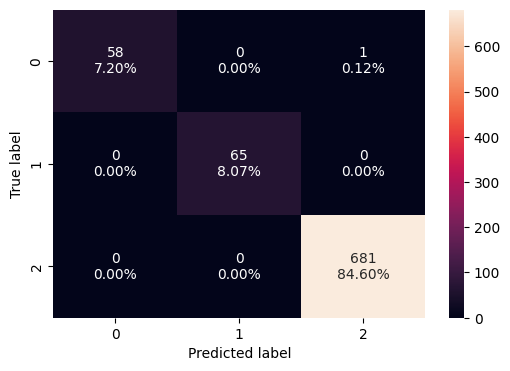

In [ ]:
confusion_matrix_sklearn(rf_bow, X_train_bow, y_train_bow)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

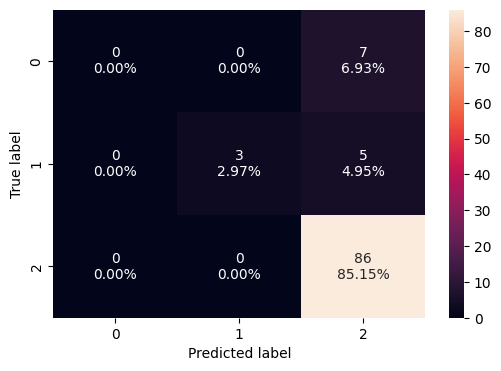

In [ ]:
confusion_matrix_sklearn(rf_bow, X_valid_bow, y_valid_bow)

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow.predict(X_valid_bow)

**Classification report**

In [ ]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.98      0.99        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      0.99      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       1.00      0.38      0.55         8
    POSITIVE       0.88      1.00      0.93        86

    accuracy                           0.88       101
   macro avg       0.63      0.46      0.49       101
weighted avg       0.83      0.88      0.84       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The model achieved an 88% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







### Random Forest Model (default with Word2Vec)

In [ ]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

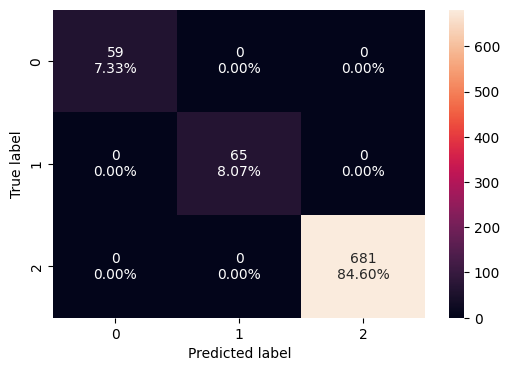

In [ ]:
confusion_matrix_sklearn(rf_bow, X_train_word2vec, y_train_word2vec)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

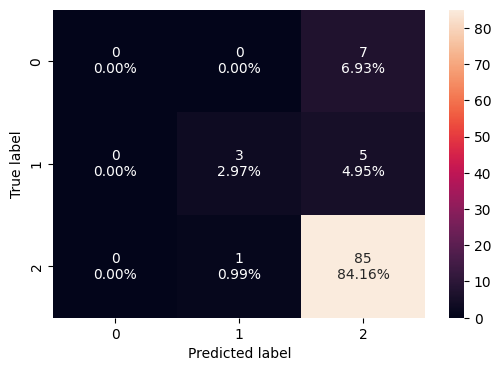

In [ ]:
confusion_matrix_sklearn(rf_bow, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_bow.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_bow.predict(X_valid_word2vec)

**Classification report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       0.75      0.38      0.50         8
    POSITIVE       0.88      0.99      0.93        86

    accuracy                           0.87       101
   macro avg       0.54      0.45      0.48       101
weighted avg       0.81      0.87      0.83       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The model achieved an 87% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







### Random Forest Model (default with GloVe)

In [ ]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

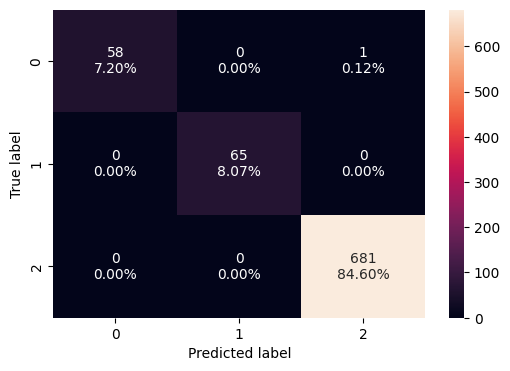

In [ ]:
confusion_matrix_sklearn(rf_bow, X_train_glove, y_train_glove)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

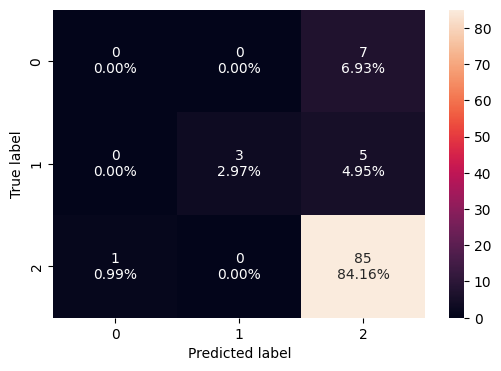

In [ ]:
confusion_matrix_sklearn(rf_bow, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_bow.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_bow.predict(X_valid_glove)

**Classification report**

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.98      0.99        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      0.99      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       1.00      0.38      0.55         8
    POSITIVE       0.88      0.99      0.93        86

    accuracy                           0.87       101
   macro avg       0.63      0.45      0.49       101
weighted avg       0.83      0.87      0.83       101



- The model achieved an 87% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







<font size=4>We'll try to address the class imbalance problem now.</font>

### Random Forest (with class_weights and BOW)

In [ ]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

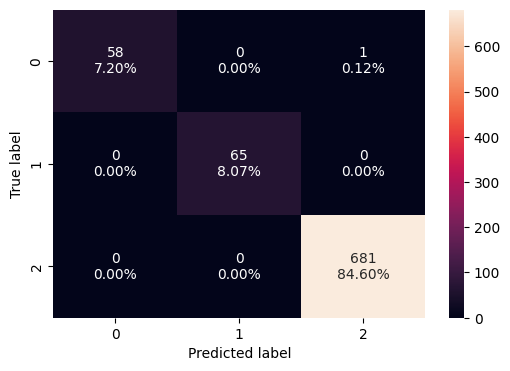

In [ ]:
confusion_matrix_sklearn(rf_bow_balanced, X_train_bow, y_train_bow)

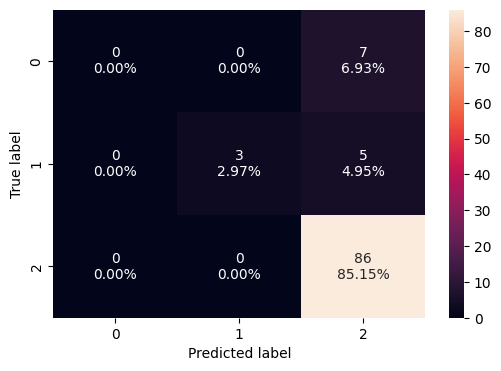

In [ ]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid_bow, y_valid_bow)

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train_bow)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid_bow)

**Classification report**

In [ ]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.98      0.99        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      0.99      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       1.00      0.38      0.55         8
    POSITIVE       0.88      1.00      0.93        86

    accuracy                           0.88       101
   macro avg       0.63      0.46      0.49       101
weighted avg       0.83      0.88      0.84       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







### Random Forest (with class_weights and Word2Vec)

In [ ]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

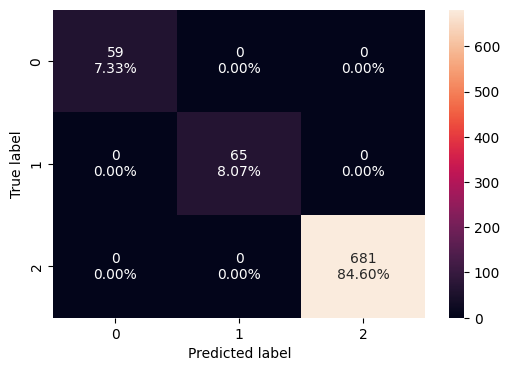

In [ ]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_train_word2vec, y_train_word2vec)

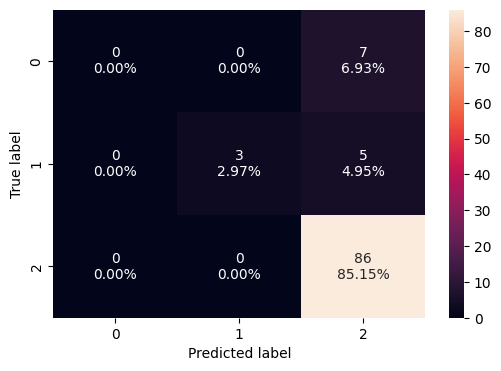

In [ ]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train = rf_word2vec_balanced.predict(X_train_word2vec)

# Predicting on test data
y_pred_valid = rf_word2vec_balanced.predict(X_valid_word2vec)

**Classification report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       0.75      0.38      0.50         8
    POSITIVE       0.88      0.99      0.93        86

    accuracy                           0.87       101
   macro avg       0.54      0.45      0.48       101
weighted avg       0.81      0.87      0.83       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







### Random Forest (with class_weights and GloVe)

In [ ]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

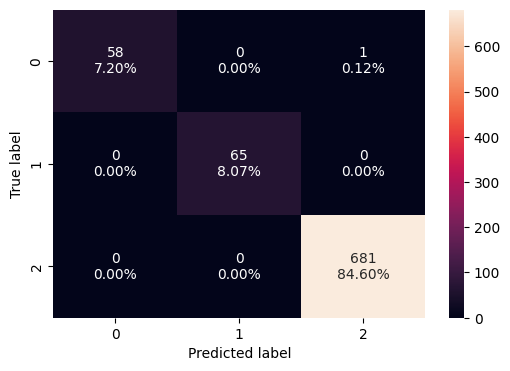

In [ ]:
confusion_matrix_sklearn(rf_glove_balanced, X_train_glove, y_train_glove)

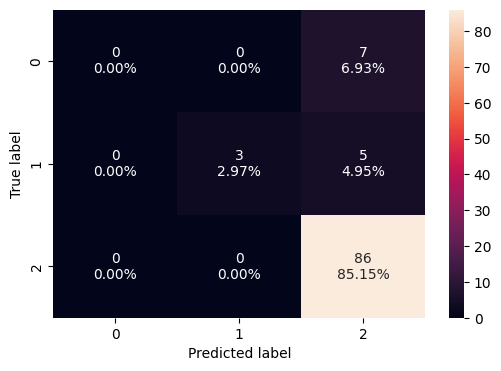

In [ ]:
confusion_matrix_sklearn(rf_glove_balanced, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train = rf_glove_balanced.predict(X_train_glove)

# Predicting on test data
y_pred_valid = rf_glove_balanced.predict(X_valid_glove)

**Classification report**

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.98      0.99        59
     NEUTRAL       1.00      1.00      1.00        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       1.00      0.99      1.00       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         7
     NEUTRAL       1.00      0.38      0.55         8
    POSITIVE       0.88      0.99      0.93        86

    accuracy                           0.87       101
   macro avg       0.63      0.45      0.49       101
weighted avg       0.83      0.87      0.83       101



- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.








<font size=4>We will now proceed to tune the model.</font>

### Random Forest (with hyperparamter tuning and BOW)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_bow, y_train_bow)

In [ ]:
# Creating a new model with the best combination of parameters
rf_bow_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_bow_tuned.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_split=5, n_estimators=70, random_state=42)

**Confusion Matrix**

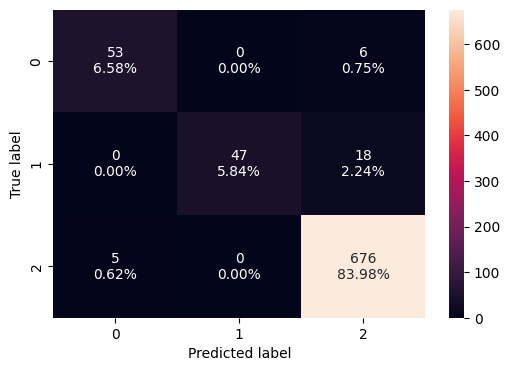

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_train_bow, y_train_bow)

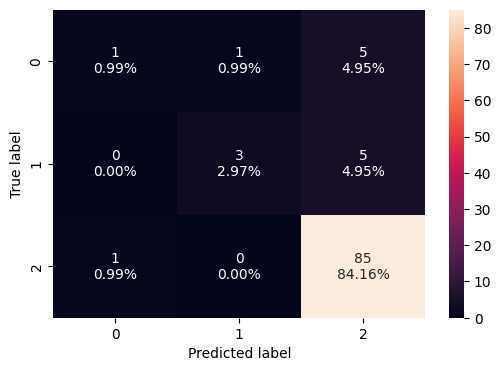

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_valid_bow, y_valid_bow)

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow_tuned.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow_tuned.predict(X_valid_bow)

**Classification report**

In [ ]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

    NEGATIVE       0.91      0.90      0.91        59
     NEUTRAL       1.00      0.72      0.84        65
    POSITIVE       0.97      0.99      0.98       681

    accuracy                           0.96       805
   macro avg       0.96      0.87      0.91       805
weighted avg       0.96      0.96      0.96       805



In [ ]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

    NEGATIVE       0.50      0.14      0.22         7
     NEUTRAL       0.75      0.38      0.50         8
    POSITIVE       0.89      0.99      0.94        86

    accuracy                           0.88       101
   macro avg       0.71      0.50      0.55       101
weighted avg       0.86      0.88      0.85       101



### Random Forest (with hyperparameter tuning and Word2Vec)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)

In [ ]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=5, n_estimators=50, random_state=42)

**Confusion Matrix**

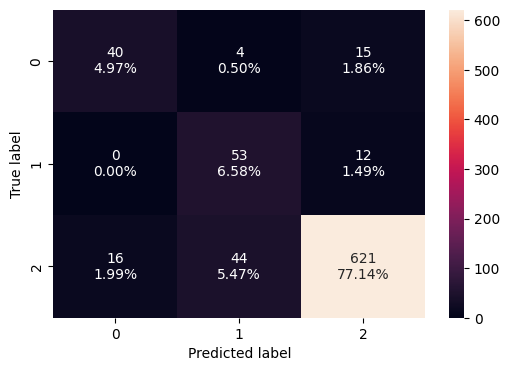

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

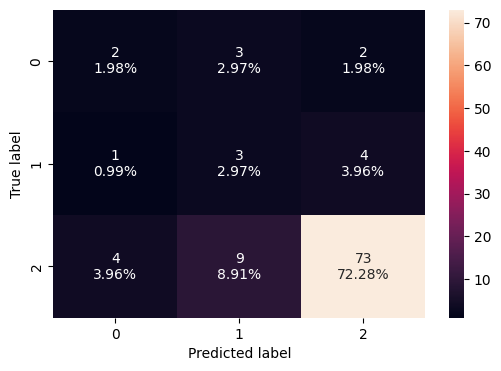

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

**Classification report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       0.71      0.68      0.70        59
     NEUTRAL       0.52      0.82      0.64        65
    POSITIVE       0.96      0.91      0.93       681

    accuracy                           0.89       805
   macro avg       0.73      0.80      0.76       805
weighted avg       0.91      0.89      0.89       805



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

    NEGATIVE       0.29      0.29      0.29         7
     NEUTRAL       0.20      0.38      0.26         8
    POSITIVE       0.92      0.85      0.88        86

    accuracy                           0.77       101
   macro avg       0.47      0.50      0.48       101
weighted avg       0.82      0.77      0.79       101



### Random Forest (with hyperparametertuning and GloVe)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [ ]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=5, n_estimators=50, random_state=42)

**Confusion Matrix**

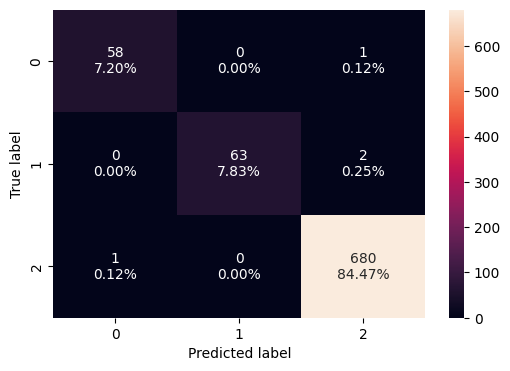

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

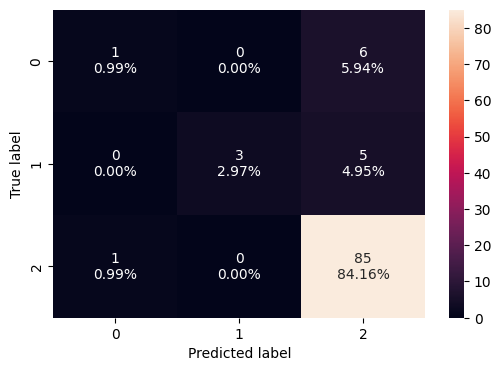

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

**Classification report**

In [ ]:
#Printing
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

    NEGATIVE       0.98      0.98      0.98        59
     NEUTRAL       1.00      0.97      0.98        65
    POSITIVE       1.00      1.00      1.00       681

    accuracy                           1.00       805
   macro avg       0.99      0.98      0.99       805
weighted avg       1.00      1.00      1.00       805



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

    NEGATIVE       0.50      0.14      0.22         7
     NEUTRAL       1.00      0.38      0.55         8
    POSITIVE       0.89      0.99      0.93        86

    accuracy                           0.88       101
   macro avg       0.80      0.50      0.57       101
weighted avg       0.87      0.88      0.85       101



- Model after tuning is still overfitting a bit, but it is able to identify the negative and neutral sentiments better than before.

- We'll move ahead with the tuned Random Forest model with BOW encoding.

# Model Testing

We'll check the performance of the tuned RF model with BOW vectors on the test set.

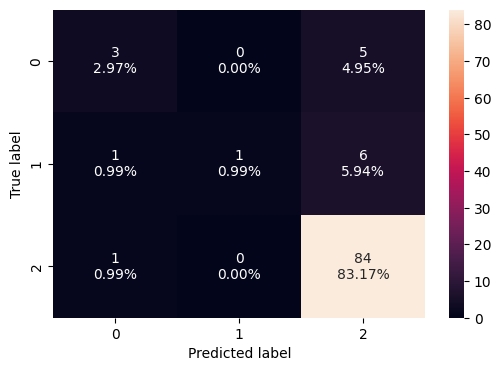

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_test_bow, y_test_bow)

In [ ]:
# Predicting on test data
y_pred_test_bow = rf_bow_tuned.predict(X_test_bow)

In [ ]:
print(classification_report(y_test_bow, y_pred_test_bow))

              precision    recall  f1-score   support

    NEGATIVE       0.60      0.38      0.46         8
     NEUTRAL       1.00      0.12      0.22         8
    POSITIVE       0.88      0.99      0.93        85

    accuracy                           0.87       101
   macro avg       0.83      0.50      0.54       101
weighted avg       0.87      0.87      0.84       101



- The model achieved a recall of 87% on the test dataset.

# Conclusion

- We analyzed the distribution of sentiments of the customers.

- We used different text processing techniques to clean the raw text data.

- We then built an ML model (Random Forest) with the vectorized data.

- The Random Forest model was able to achieve a recall score of 88% on the test dataset.
    - The model can be tuned further or a different model can be trained to model the data better.

- By pinpointing areas of improvement or concerns raised by customers based on the predictions of the model, the organization can take swift and targeted actions to address issues, minimizing the risk of revenue loss and bolstering customer satisfaction.

- The organization can leverage sentiment categorizations to tailor marketing strategies.
    - Highlighting positive sentiments in promotional material can contribute to a positive brand image.
    - They can use neutral and negative sentiments to make informed decisions around inventory.

<font size=6 color='blue'>Power Ahead</font>
___